**Lab 3: Direct Sequence Spread Spectrum (DSSS)**

Text(0, 0.5, 'Amplitude')

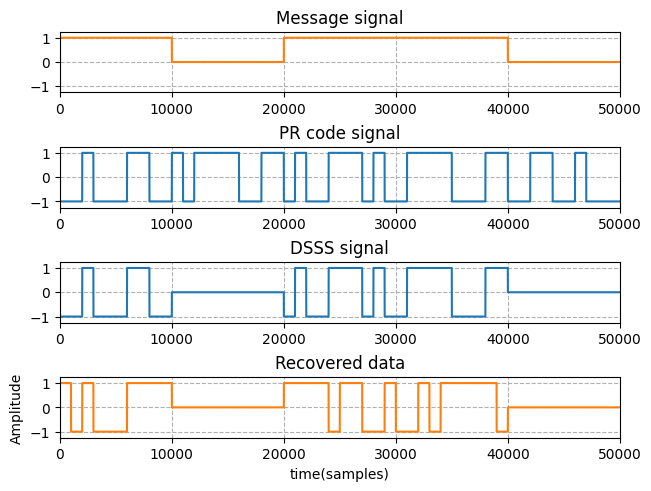

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Fs = 1000    #Sampling frequency
length_prn = 50 
t = np.arange(0,length_prn,1/Fs)

# Generate a psudo-random code  
PNcode = np.random.choice([-1,1], size=(length_prn))  #shared secret between the transmitter and reciever
code_t = np.kron(PNcode,np.ones(int(len(t)/length_prn)))

# generate message signal
data = np.array([1,0,1,1,0])    #to avoid warnings choose length of data to be a multiple of 5
m_t = np.kron(data,np.ones(int(len(t)/len(data))))

# Spread the message signal by multiplying it with the pseudo-random code
dsss_sig = m_t * code_t

#Now at receiver .....
rx = dsss_sig

# Lets recover the message bits using psudo-random code 
rxPNCode = np.random.choice([-1,1], size=(length_prn))
rxPNCode_t = np.kron(rxPNCode,np.ones((int(len(t)/length_prn)))) 
recover_data = rx * rxPNCode_t

#Plotting signals
fig, axs = plt.subplots(4, constrained_layout=True)
axs[0].plot(m_t, 'tab:orange')
axs[0].set_title('Message signal')
axs[0].set_ylim([-1.25,1.25])
axs[0].set_xlim([0,len(t)])
axs[0].grid(True, linestyle='--')

axs[1].plot(code_t)
axs[1].set_title('PR code signal')
axs[1].set_ylim([-1.25,1.25])
axs[1].set_xlim([0,len(t)])
axs[1].grid(True, linestyle='--')

axs[2].plot(dsss_sig)
axs[2].set_title('DSSS signal')
axs[2].set_ylim([-1.25,1.25])
axs[2].set_xlim([0,len(t)])
axs[2].grid(True, linestyle='--')

axs[3].plot(recover_data, 'tab:orange')
axs[3].set_title('Recovered data')
axs[3].set_ylim([-1.25,1.25])
axs[3].set_xlim([0,len(t)])
axs[3].grid(True, linestyle='--')
# this recovered signal needs to be corrected!!

plt.xlabel('time(samples)')
plt.ylabel('Amplitude')


Now that you have got a fair understanding of how the DSSS coding works, we will now see the "Actual spreading". For this, the signal is modulated using an appropriate modulation technique (say BPSK) and upmixed to a suitable carrier frequency Fc before transmission. We also generate noise signal of energy Enoise.

Text(0, 0.5, 'Amplitude')

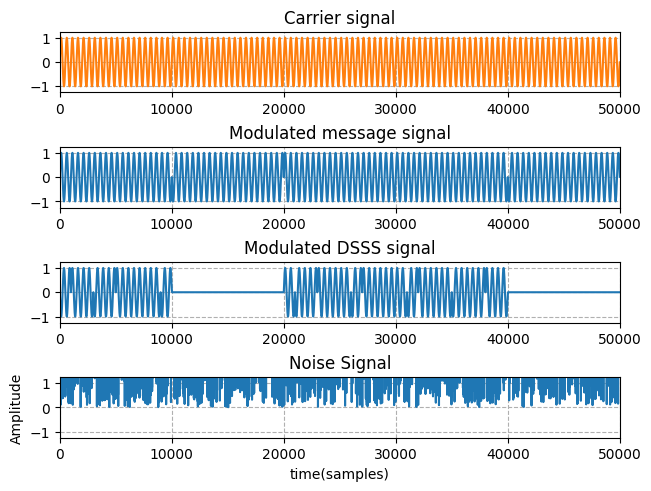

In [11]:
# Carrier signal
Fc = 2    #Carrier frequency
c_samples = np.arange(len(m_t))
carrier = np.sin(2*np.pi*Fc*c_samples/Fs)

# Beside modulating DSSS signal, lets also modulate the message signal and then analyse both in presence of noise signal in PSD
m_t = (m_t * 2 ) - 1
m_psk = carrier * m_t
dsss_psk = carrier * dsss_sig

# Generating a noise signal
Enoise = 100
noise_sig = Enoise * np.random.rand(len(dsss_sig))

# Plotting the individual signals for reference
fig, axs = plt.subplots(4, constrained_layout=True)
axs[0].plot(carrier, 'tab:orange')
axs[0].set_title('Carrier signal')
axs[0].set_ylim([-1.25,1.25])
axs[0].set_xlim([0,len(t)])
axs[0].grid(True, linestyle='--')

axs[1].plot(m_psk)
axs[1].set_title('Modulated message signal')
axs[1].set_ylim([-1.25,1.25])
axs[1].set_xlim([0,len(t)])
axs[1].grid(True, linestyle='--')

axs[2].plot(dsss_psk)
axs[2].set_title('Modulated DSSS signal')
axs[2].set_ylim([-1.25,1.25])
axs[2].set_xlim([0,len(t)])
axs[2].grid(True, linestyle='--')

axs[3].plot(noise_sig)
axs[3].set_title('Noise Signal')
axs[3].set_ylim([-1.25,1.25])
axs[3].set_xlim([0,len(t)])
axs[3].grid(True, linestyle='--')

plt.xlabel('time(samples)')
plt.ylabel('Amplitude')

Now, plot the power spectral density (the amount of energy present in each frequency band) for modulated message signal, modulated DSSS signal and the noise signal.

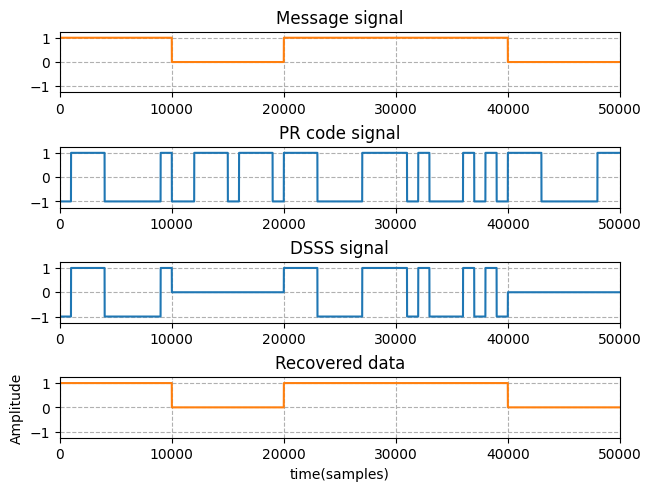

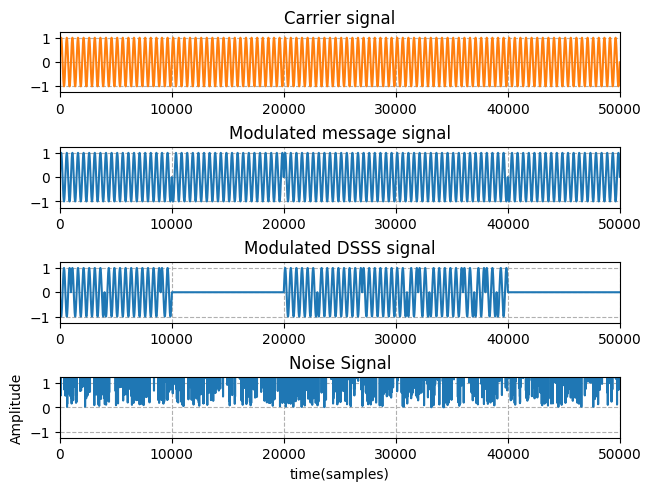

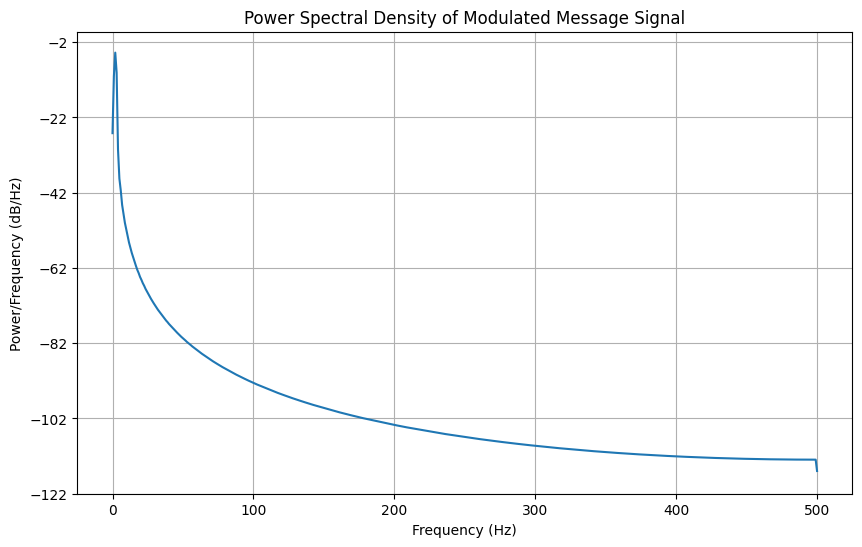

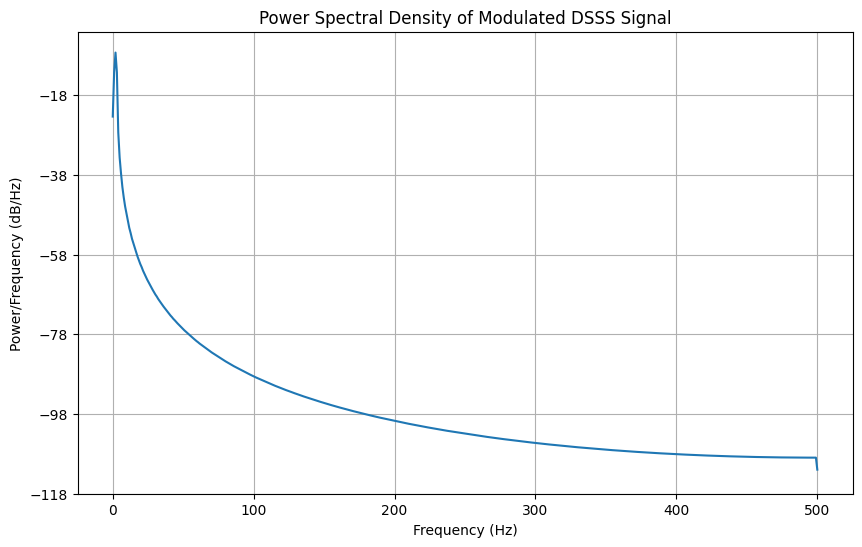

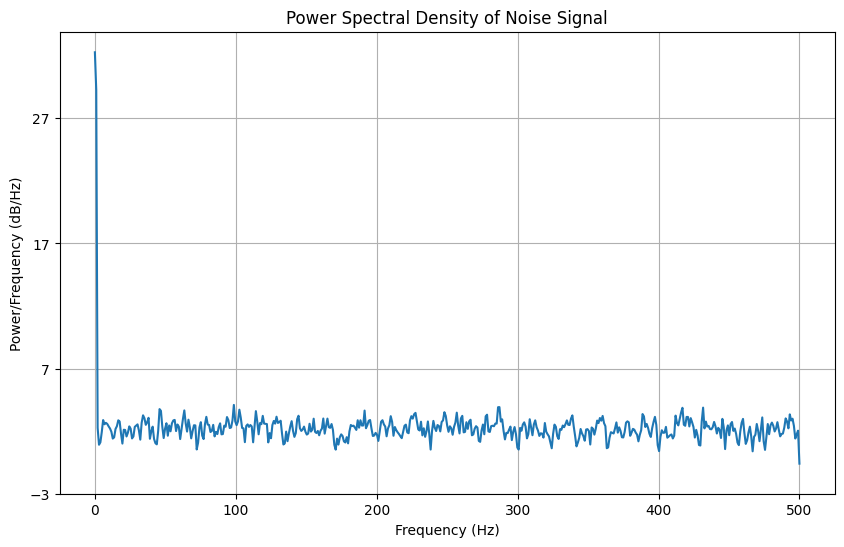

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Part 1: DSSS Transmitter and Receiver

Fs = 1000    # Sampling frequency
length_prn = 50
t = np.arange(0, length_prn, 1/Fs)

# Generate a pseudo-random code
PNcode = np.random.choice([-1, 1], size=(length_prn))
code_t = np.kron(PNcode, np.ones(int(len(t)/length_prn)))

# Generate message signal
data = np.array([1, 0, 1, 1, 0])
m_t = np.kron(data, np.ones(int(len(t)/len(data))))

# Spread the message signal by multiplying it with the pseudo-random code
dsss_sig = m_t * code_t

# Receiver code correction
rxPNCode_t = np.kron(PNcode, np.ones((int(len(t)/length_prn))))
recover_data = dsss_sig * rxPNCode_t

# Plotting signals
fig, axs = plt.subplots(4, constrained_layout=True)
axs[0].plot(m_t, 'tab:orange')
axs[0].set_title('Message signal')
axs[0].set_ylim([-1.25, 1.25])
axs[0].set_xlim([0, len(t)])
axs[0].grid(True, linestyle='--')

axs[1].plot(code_t)
axs[1].set_title('PR code signal')
axs[1].set_ylim([-1.25, 1.25])
axs[1].set_xlim([0, len(t)])
axs[1].grid(True, linestyle='--')

axs[2].plot(dsss_sig)
axs[2].set_title('DSSS signal')
axs[2].set_ylim([-1.25, 1.25])
axs[2].set_xlim([0, len(t)])
axs[2].grid(True, linestyle='--')

axs[3].plot(recover_data, 'tab:orange')
axs[3].set_title('Recovered data')
axs[3].set_ylim([-1.25, 1.25])
axs[3].set_xlim([0, len(t)])
axs[3].grid(True, linestyle='--')

plt.xlabel('time(samples)')
plt.ylabel('Amplitude')

# Part 2: Actual Spreading

# Carrier signal
Fc = 2    # Carrier frequency
c_samples = np.arange(len(m_t))
carrier = np.sin(2*np.pi*Fc*c_samples/Fs)

# Beside modulating DSSS signal, let's also modulate the message signal
m_t = (m_t * 2) - 1
m_psk = carrier * m_t
dsss_psk = carrier * dsss_sig

# Generating a noise signal
Enoise = 100
noise_sig = Enoise * np.random.rand(len(dsss_sig))

# Plotting the individual signals for reference
fig, axs = plt.subplots(4, constrained_layout=True)
axs[0].plot(carrier, 'tab:orange')
axs[0].set_title('Carrier signal')
axs[0].set_ylim([-1.25, 1.25])
axs[0].set_xlim([0, len(t)])
axs[0].grid(True, linestyle='--')

axs[1].plot(m_psk)
axs[1].set_title('Modulated message signal')
axs[1].set_ylim([-1.25, 1.25])
axs[1].set_xlim([0, len(t)])
axs[1].grid(True, linestyle='--')

axs[2].plot(dsss_psk)
axs[2].set_title('Modulated DSSS signal')
axs[2].set_ylim([-1.25, 1.25])
axs[2].set_xlim([0, len(t)])
axs[2].grid(True, linestyle='--')

axs[3].plot(noise_sig)
axs[3].set_title('Noise Signal')
axs[3].set_ylim([-1.25, 1.25])
axs[3].set_xlim([0, len(t)])
axs[3].grid(True, linestyle='--')

plt.xlabel('time(samples)')
plt.ylabel('Amplitude')

# Part 3: Power Spectral Density (PSD) Plotting

# Plot the PSD of the modulated message signal
plt.figure(figsize=(10, 6))
plt.psd(m_psk, NFFT=1024, Fs=Fs)
plt.title('Power Spectral Density of Modulated Message Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

# Plot the PSD of the modulated DSSS signal
plt.figure(figsize=(10, 6))
plt.psd(dsss_psk, NFFT=1024, Fs=Fs)
plt.title('Power Spectral Density of Modulated DSSS Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

# Plot the PSD of the noise signal
plt.figure(figsize=(10, 6))
plt.psd(noise_sig, NFFT=1024, Fs=Fs)
plt.title('Power Spectral Density of Noise Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')

plt.show()


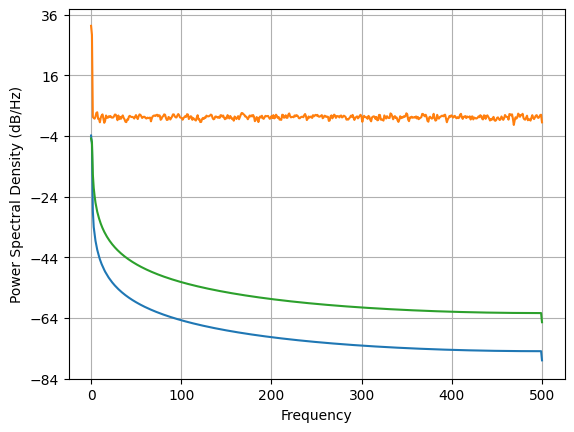

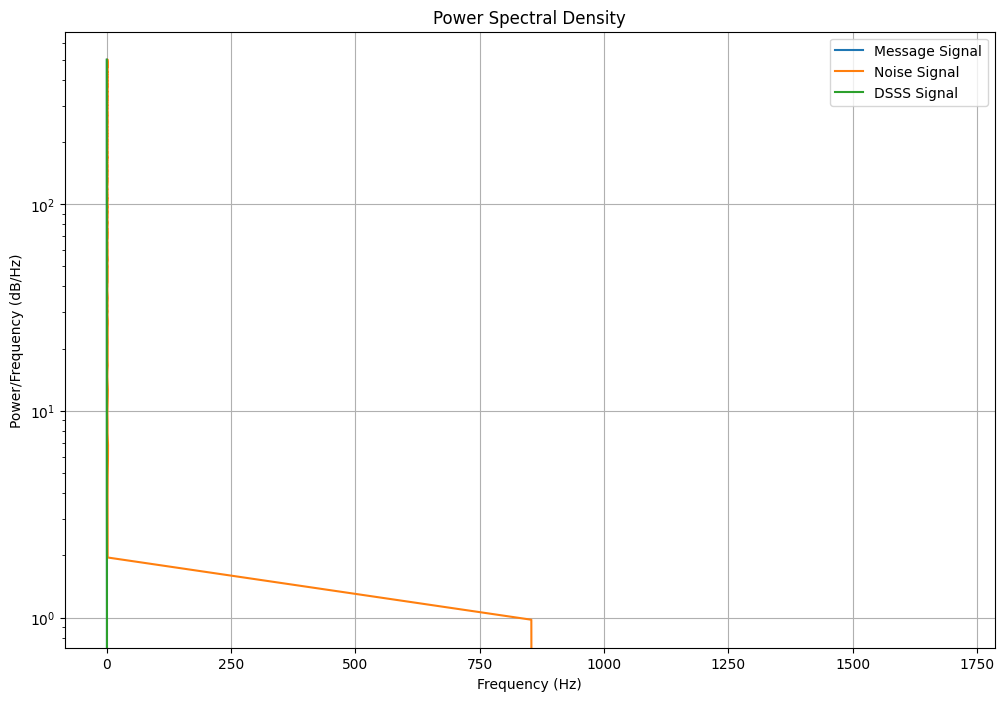

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Part 1: DSSS Transmitter and Receiver

Fs = 1000    # Sampling frequency
length_prn = 50
t = np.arange(0, length_prn, 1/Fs)

# Generate a pseudo-random code
PNcode = np.random.choice([-1, 1], size=(length_prn))
code_t = np.kron(PNcode, np.ones(int(len(t)/length_prn)))

# Generate message signal
data = np.array([1, 0, 1, 1, 0])
m_t = np.kron(data, np.ones(int(len(t)/len(data))))

# Spread the message signal by multiplying it with the pseudo-random code
dsss_sig = m_t * code_t

# Receiver code correction
rxPNCode_t = np.kron(PNcode, np.ones((int(len(t)/length_prn))))
recover_data = dsss_sig * rxPNCode_t

# Convert recovered bits to ASCII string
recovered_message_bits = (recover_data > 0).astype(int)
recovered_message_ascii = ''.join(chr(int(''.join(map(str, group)), 2)) for group in np.array_split(recovered_message_bits, len(recovered_message_bits) // 8))

# print("Recovered Message (ASCII):", recovered_message_ascii)

# Generating a noise signal
Enoise = 100
noise_sig = Enoise * np.random.rand(len(dsss_sig))

# Calculate PSD for Message, Noise, and DSSS Signal
f_message, psd_message = plt.psd(m_t, NFFT=1024, Fs=Fs)
f_noise, psd_noise = plt.psd(noise_sig, NFFT=1024, Fs=Fs)
f_dsss, psd_dsss = plt.psd(dsss_sig, NFFT=1024, Fs=Fs)

# Plot the PSDs
plt.figure(figsize=(12, 8))
plt.semilogy(f_message, psd_message, label='Message Signal')
plt.semilogy(f_noise, psd_noise, label='Noise Signal')
plt.semilogy(f_dsss, psd_dsss, label='DSSS Signal')
plt.title('Power Spectral Density')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power/Frequency (dB/Hz)')
plt.legend()
plt.grid(True)
plt.show()
